In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv('dataset.csv')
data

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [3]:
data.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

In [4]:
data=data.rename(columns={'3':'symboling', '?':'normalised_losses', 'alfa-romero':'make', 'gas':'fuel_type','std':'aspiration',
                          'two':'num_of_doors', 'convertible':'car_style', 'rwd':'drive_wheels', 'front':'engine_location', 
                          '88.60':'wheel_base', '168.80':'length', '64.10':'width', '48.80':'height', '2548':'curb_weight',
                          'dohc':'engine_type', 'four':'num_of_cylinders', '130':'engine_size', 'mpfi':'fuel_system', 
                          '3.47':'bore', '2.68':'stroke', '9.00':'compression_ratio', '111':'horse_power', '5000':'peak_rpm', 
                          '21':'city_mpg', '27':'highway_mpg','13495':'price'})

In [5]:
data

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


# data exploration

In [6]:
data.shape

(200, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalised_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   car_style          200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

# checking/ handling null values and duplicates

In [8]:
data.isna().sum()

symboling            0
normalised_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
car_style            0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalised_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   car_style          200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

In [11]:
data['car_style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [12]:
data['num_of_doors'].unique()

array(['two', 'four', '?'], dtype=object)

# question mark is present in some of the rows (which means null values is present for some of the rows)for some of the columns so  replacing the question marks into null values to find out the null values present in the rows and columns.

In [13]:
data[data['normalised_losses']=='?']

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
12,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
13,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
14,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
15,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
41,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
42,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [14]:
data=data.replace({'?':np.nan})

In [15]:
data['bore'].unique()

array(['3.47', '2.68', '3.19', '3.13', '3.50', '3.31', '3.62', '2.91',
       '3.03', '2.97', '3.34', '3.60', '2.92', '3.15', '3.43', '3.63',
       '3.54', '3.08', nan, '3.39', '3.76', '3.58', '3.46', '3.80',
       '3.78', '3.17', '3.35', '3.59', '2.99', '3.33', '3.70', '3.61',
       '3.94', '3.74', '2.54', '3.05', '3.27', '3.24', '3.01'],
      dtype=object)

In [16]:
data

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [17]:
data.isna().sum()

symboling             0
normalised_losses    36
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
car_style             0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horse_power           2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [18]:
data.duplicated().sum()

0

# for some columns null values are present on the same row

In [19]:
data[data['bore'].isna()]     #null values are present on the same row

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
51,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,10945
52,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,11845
53,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000,17,23,13645
54,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000,16,23,15645


In [20]:
data[data['horse_power'].isna()] #null values are present on the same row

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
125,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
126,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895


In [21]:
data[data['num_of_doors'].isna()] #null values are present on the same row

,symboling,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
25,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
59,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [22]:
data=data.dropna()

In [23]:
data.isna().sum()

symboling            0
normalised_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
car_style            0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horse_power          0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [24]:
data.shape

(159, 26)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalised_losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   car_style          159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non-null

In [26]:
data['peak_rpm'].unique()

array(['5500', '5800', '4250', '5100', '5400', '5000', '4800', '6000',
       '4750', '4350', '5200', '4150', '5600', '5250', '4900', '4400',
       '4500', '6600', '4200', '5300'], dtype=object)

In [27]:
data['peak_rpm']=data['peak_rpm'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\3746442801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peak_rpm']=data['peak_rpm'].astype('int')


In [28]:
data['horse_power'].unique()

array(['102', '115', '110', '140', '101', '121', '48', '70', '68', '88',
       '145', '58', '76', '60', '86', '100', '176', '84', '120', '123',
       '155', '116', '69', '55', '97', '152', '160', '200', '95', '142',
       '143', '73', '82', '94', '111', '62', '56', '112', '92', '161',
       '156', '52', '85', '90', '114', '162', '134', '106'], dtype=object)

In [29]:
data['horse_power']=data['horse_power'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\3310413805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horse_power']=data['horse_power'].astype('int')


In [30]:
data['bore'].unique()

array(['3.19', '3.13', '3.50', '3.31', '2.91', '3.03', '2.97', '3.34',
       '3.60', '2.92', '3.15', '3.63', '3.08', '3.39', '3.76', '3.58',
       '3.46', '3.17', '3.35', '2.99', '3.33', '3.43', '3.70', '3.61',
       '3.94', '3.54', '2.54', '3.62', '3.05', '3.27', '3.24', '3.01',
       '3.78'], dtype=object)

In [31]:
data['bore']=data['bore'].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\1733838565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bore']=data['bore'].astype('float')


In [32]:
data['stroke'].unique()

array(['3.40', '2.80', '3.19', '3.03', '3.11', '3.23', '3.39', '3.46',
       '3.90', '3.41', '3.07', '3.58', '4.17', '3.15', '3.16', '3.64',
       '3.10', '3.29', '3.47', '3.27', '3.52', '2.19', '3.21', '2.07',
       '2.36', '2.64', '3.35', '3.08', '3.50', '3.54', '2.87'],
      dtype=object)

In [33]:
data['stroke']=data['stroke'].astype('float')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\2167592619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stroke']=data['stroke'].astype('float')


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 2 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalised_losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   car_style          159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non-null

In [35]:
data.select_dtypes(exclude=np.number)

,normalised_losses,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
2,164,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,164,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,158,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,158,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,192,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...,...
195,95,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,95,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,95,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,95,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [36]:
data['normalised_losses'].unique()

array(['164', '158', '192', '188', '121', '98', '81', '118', '148', '110',
       '145', '137', '101', '78', '106', '85', '107', '104', '113', '129',
       '115', '93', '142', '161', '153', '125', '128', '122', '103',
       '168', '108', '194', '231', '119', '154', '74', '186', '150', '83',
       '102', '89', '87', '77', '91', '134', '65', '197', '90', '94',
       '256', '95'], dtype=object)

In [37]:
data['normalised_losses']=data['normalised_losses'].astype('int')

C:\Users\DELL\AppData\Local\Temp\ipykernel_5440\2273691169.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalised_losses']=data['normalised_losses'].astype('int')


In [38]:
data['normalised_losses'].unique()

array([164, 158, 192, 188, 121,  98,  81, 118, 148, 110, 145, 137, 101,
        78, 106,  85, 107, 104, 113, 129, 115,  93, 142, 161, 153, 125,
       128, 122, 103, 168, 108, 194, 231, 119, 154,  74, 186, 150,  83,
       102,  89,  87,  77,  91, 134,  65, 197,  90,  94, 256,  95])

In [39]:
data.select_dtypes(include=np.number)

,symboling,normalised_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [40]:
data.select_dtypes(exclude=np.number)

,make,fuel_type,aspiration,num_of_doors,car_style,drive_wheels,engine_location,engine_type,num_of_cylinders,fuel_system
2,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
3,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
5,audi,gas,std,four,sedan,fwd,front,ohc,five,mpfi
7,audi,gas,turbo,four,sedan,fwd,front,ohc,five,mpfi
8,bmw,gas,std,two,sedan,rwd,front,ohc,four,mpfi
...,...,...,...,...,...,...,...,...,...,...
195,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
196,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
197,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
198,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


# exploratory data analysis

<Axes: >

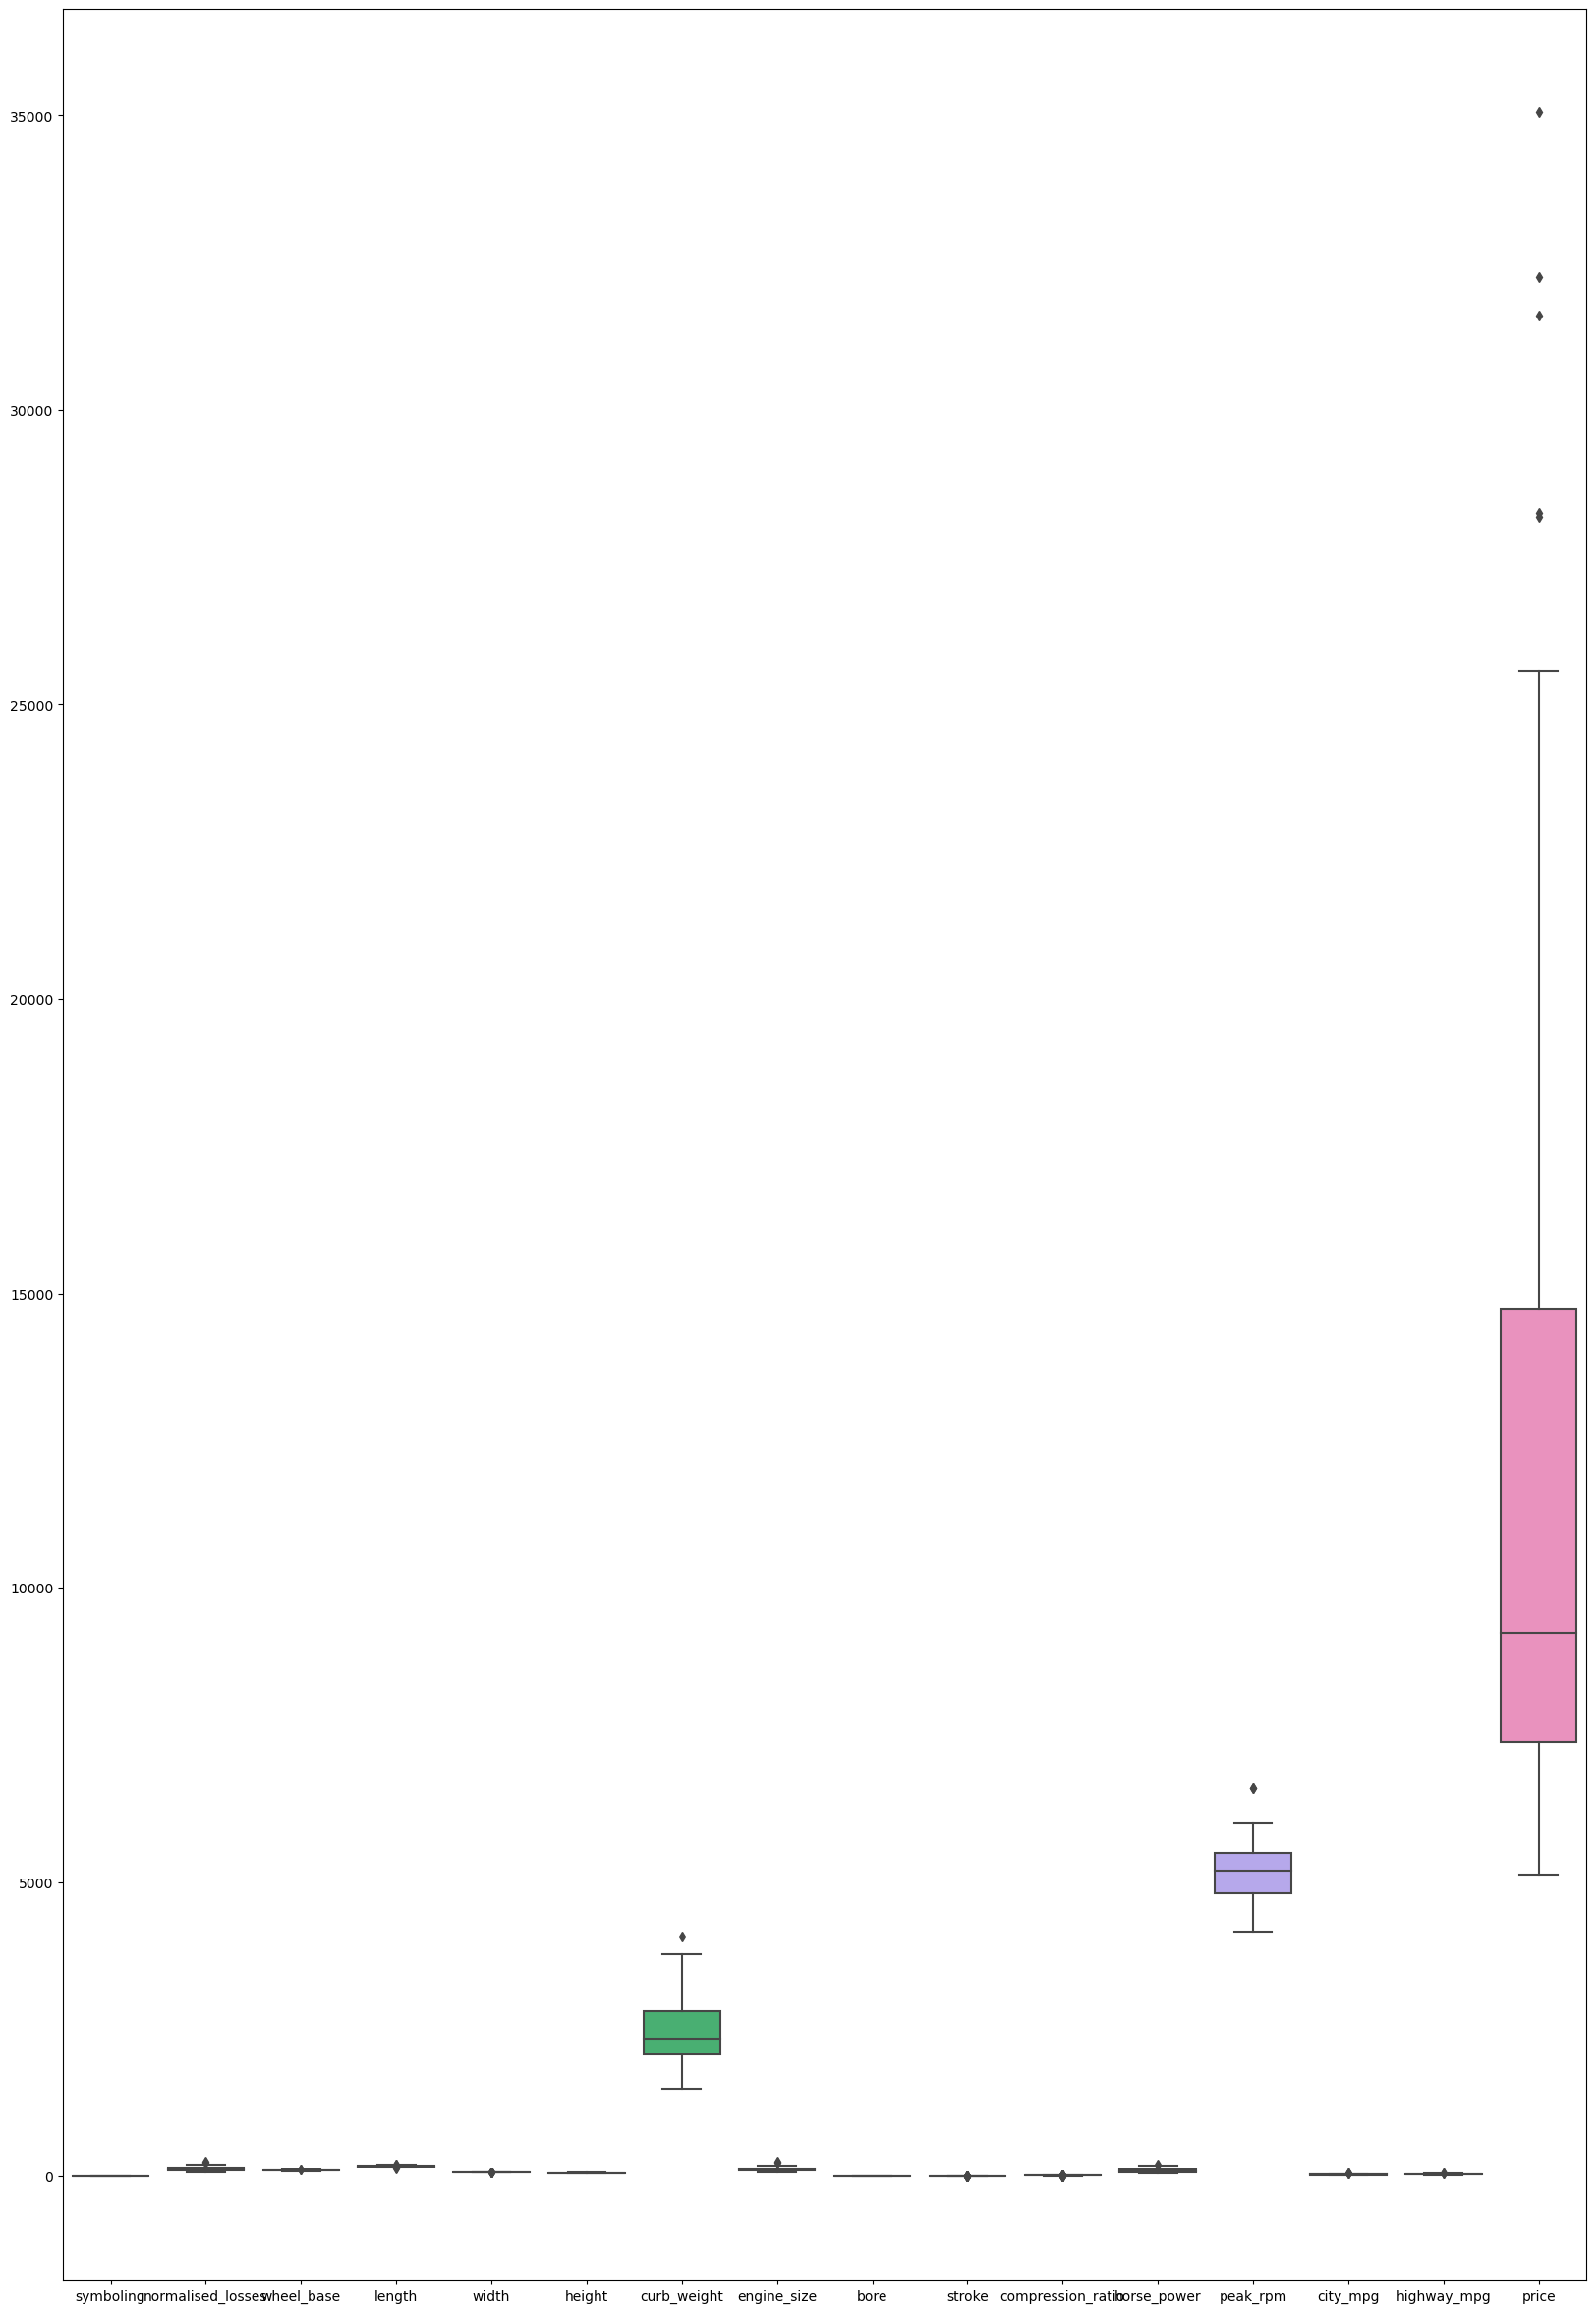

In [41]:
plt.figure(figsize=(20,30))
sns.boxplot(data)

<Axes: ylabel='count'>

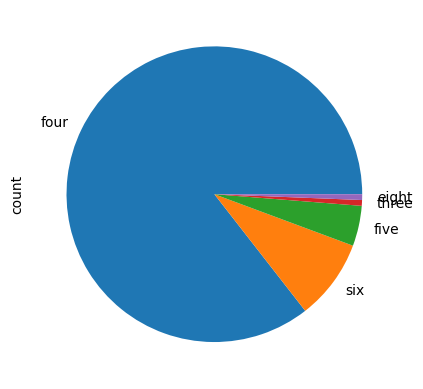

In [42]:
data['num_of_cylinders'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

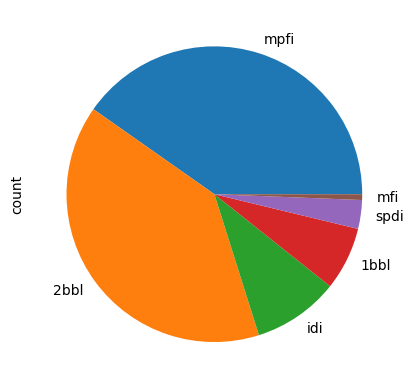

In [43]:
data['fuel_system'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

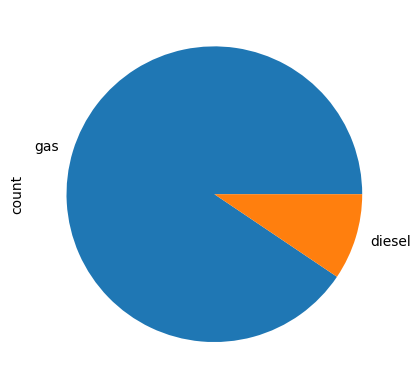

In [44]:
data['fuel_type'].value_counts().plot(kind='pie')

In [45]:
data.select_dtypes(include=np.number).corr()

,symboling,normalised_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,-0.162794
normalised_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,0.202761
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,0.734419
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,0.760952
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,0.843371
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,0.244836
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,0.893639
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,0.841496
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,0.533890
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,0.160664


<Axes: >

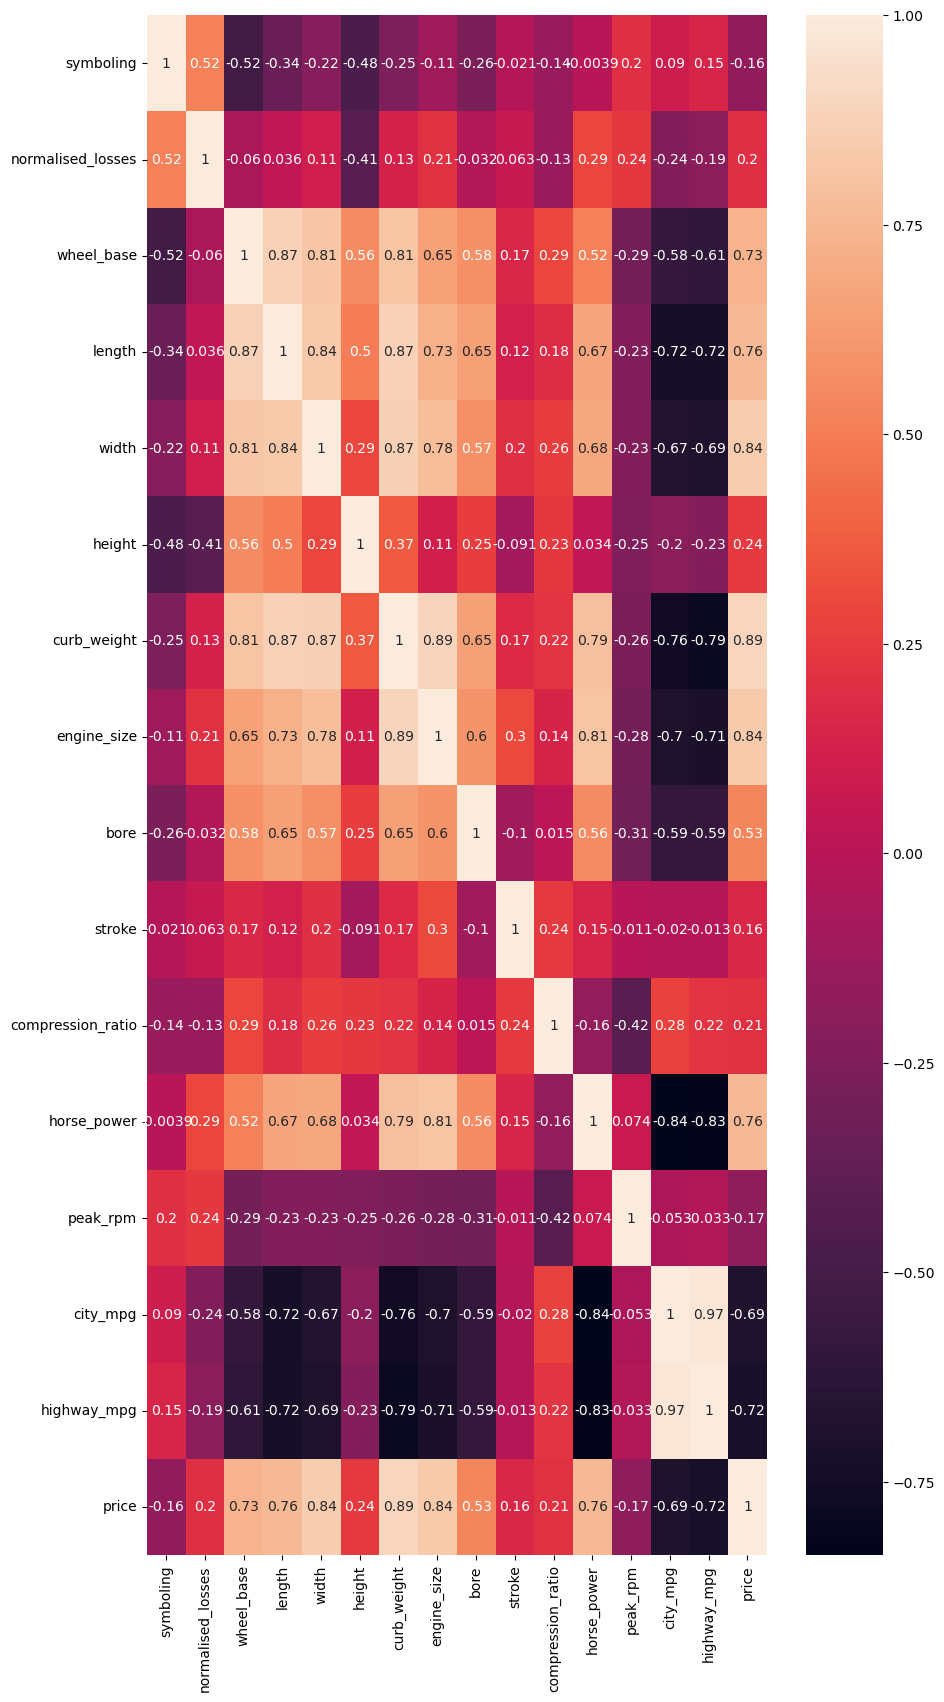

In [46]:
plt.figure(figsize=(10,20))
sns.heatmap(data.select_dtypes(include=np.number).corr(),annot=True)

In [47]:
cat_cols=data.select_dtypes(exclude=np.number)
num_cols=data.select_dtypes(include=np.number)

# Preprocessing

In [48]:
encoded_cat=pd.get_dummies(cat_cols)

In [49]:
encoded_cat

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,...,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
2,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
5,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
7,True,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
8,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
196,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
197,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
198,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [56]:
encoded_cat=encoded_cat.astype('str')

In [58]:
encoded_cat=encoded_cat.replace({'True':1,'False':0})

In [59]:
encoded_cat

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,...,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_1bbl,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
196,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [60]:
data_preprocessed=pd.concat([encoded_cat,num_cols],axis=1)

In [61]:
data_preprocessed

,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,make_nissan,...,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
2,1,0,0,0,0,0,0,0,0,0,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,1,0,0,0,0,0,0,0,0,0,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,1,0,0,0,0,0,0,0,0,0,...,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,1,0,0,0,0,0,0,0,0,0,...,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
8,0,1,0,0,0,0,0,0,0,0,...,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,0,0,0,0,0,0,0,0,0,0,...,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,0,0,0,0,0,0,0,0,0,0,...,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,0,0,0,0,0,0,0,0,0,0,...,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


In [65]:
[variance_inflation_factor(data[['peak_rpm','city_mpg','highway_mpg','horse_power','engine_size']].values, i) for i in range(data[['peak_rpm','city_mpg','highway_mpg','horse_power','engine_size']].shape[1])]

[88.04203918992593,
 393.3684567455056,
 455.81416161696893,
 66.97827663071247,
 50.425813313958976]

# Linear Regression

In [66]:
X=data_preprocessed.drop(columns=['price'])
y=data_preprocessed['price']

In [67]:
model=LinearRegression()

In [68]:
model.fit(X,y)

LinearRegression()

In [69]:
tr_predict=pd.DataFrame(model.predict(X))

In [70]:
model.coef_

array([-1.77195571e+13, -1.77195571e+13, -1.77195571e+13, -1.77195571e+13,
       -1.77195571e+13, -1.77195571e+13, -1.77195571e+13, -1.77195571e+13,
       -1.77195571e+13, -1.77195571e+13, -1.00818170e+13, -1.77195571e+13,
       -1.77195571e+13, -1.77195571e+13, -7.02672092e+12, -1.77195571e+13,
       -1.77195571e+13, -1.77195571e+13,  2.75081702e+03, -2.75101898e+03,
       -1.08594214e+03,  1.08602136e+03,  4.18410156e+02, -4.18363281e+02,
        4.54646532e+03, -1.08562560e+03, -1.19407715e+03, -1.16281201e+03,
       -1.10572784e+03, -6.50613770e+02, -6.80281250e+02,  1.33098389e+03,
        0.00000000e+00,  3.66611526e+12, -3.97162487e+12,  3.66611526e+12,
       -7.02672092e+12,  3.66611526e+12, -1.52754802e+12, -1.52754803e+12,
       -1.52754803e+12, -1.52754803e+12,  6.11019210e+12, -2.39544043e+03,
       -3.24871826e+02,  2.75096967e+03,  1.07697250e+03,  2.06681885e+02,
       -1.31457471e+03, -5.10546875e+00,  5.49414062e+00,  3.18187500e+02,
       -7.61875000e+01,  

In [71]:
model.intercept_

15580989859791.025

<Axes: ylabel='Frequency'>

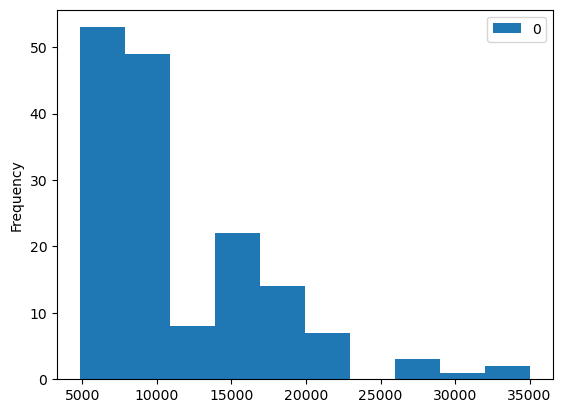

In [72]:
tr_predict.plot(kind='hist')

In [73]:
def error_met(act,pred):
    mae=mean_absolute_error(act,pred)
    mape=mean_absolute_percentage_error(act,pred)
    rmse=np.sqrt(mean_squared_error(act,pred))
    mse=mean_squared_error(act,pred)
    r2=r2_score(act,pred)
    
    print('mae:',mae)
    print('mape:',mape)
    print('rmse:',rmse)
    print('mse:',mse)
    print('r2 score:',r2)

In [74]:
error_met(y,tr_predict)

mae: 748.4610603380503
mape: 0.0731079623794657
rmse: 955.6147664135069
mse: 913199.5817875413
r2 score: 0.9734008457459248


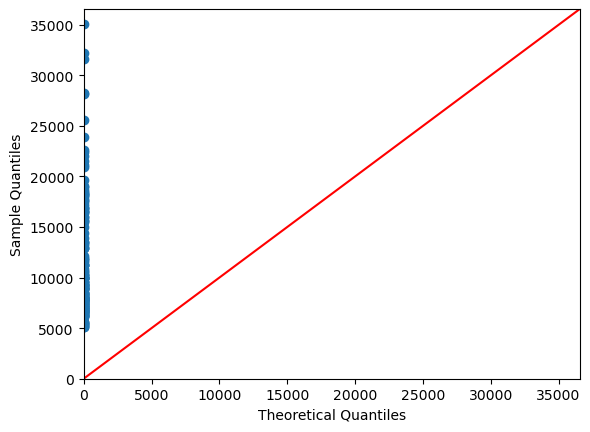

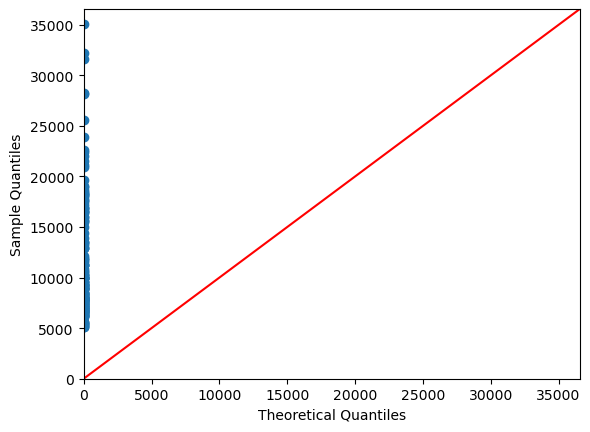

In [76]:
sm.qqplot(data['price'],line='45')

# creating a model by using train test split method 

In [77]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.3,random_state=43)

In [78]:
train_X.shape, test_X.shape

((111, 64), (48, 64))

In [79]:
num_cols

,symboling,normalised_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
2,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,5500,17,20,23875
8,2,192,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470


# Linear regression model for horsepower vs price

<Axes: xlabel='horse_power', ylabel='price'>

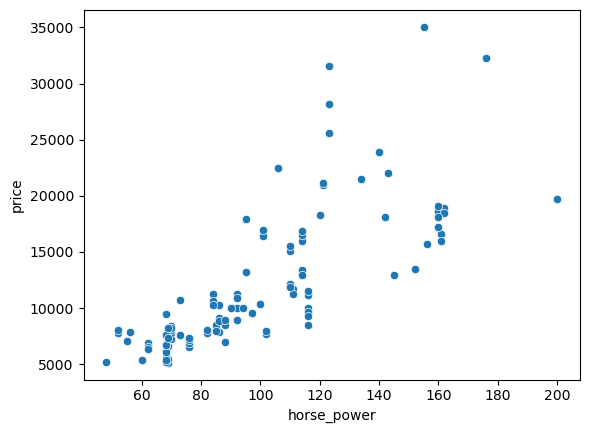

In [80]:
sns.scatterplot(x=train_X['horse_power'],y=train_y,data=data)

In [81]:
reg_1=LinearRegression()

In [82]:
reg_1.fit(train_X[['horse_power']],train_y)

LinearRegression()

In [83]:
train_predreg1=reg_1.predict(train_X[['horse_power']])
test_predreg1=reg_1.predict(test_X[['horse_power']])

In [84]:
error_met(train_y,train_predreg1)

mae: 2729.490308211298
mape: 0.21532485144839406
rmse: 3957.680863766158
mse: 15663237.819420842
r2 score: 0.5931305003197604


In [85]:
error_met(test_y,test_predreg1)

mae: 2461.748109339055
mape: 0.21377011974132296
rmse: 3442.948548210996
mse: 11853894.705628203
r2 score: 0.4943591475177441


train_error> test_error which means it is underfitting

In [86]:
reg_1.coef_

array([147.65566359])

In [87]:
reg_1.intercept_

-2695.2764091004083

#  Price= 147.65566359[horsepower] + (-2695.2764091004083)
y= Price
x=horsepower
m=147.65566359
b=-2695.2764091004083

Text(0, 0.5, 'Price')

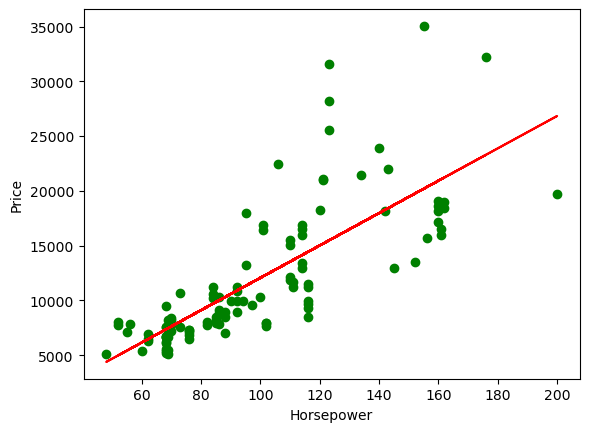

In [88]:
plt.scatter(train_X['horse_power'],train_y,color='green')
plt.plot(train_X['horse_power'],train_predreg1,color='red')
plt.xlabel('Horsepower')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

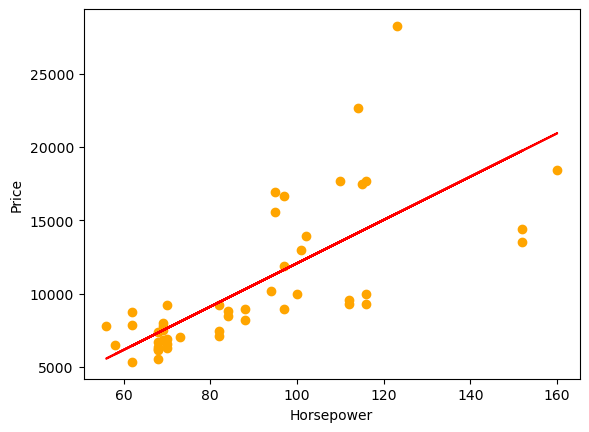

In [90]:
plt.scatter(test_X['horse_power'],test_y,color='orange')
plt.plot(test_X['horse_power'],test_predreg1,color='red')
plt.xlabel('Horsepower')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

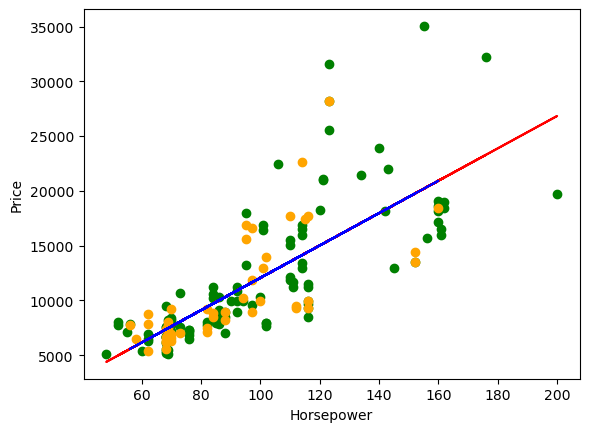

In [93]:
plt.scatter(train_X['horse_power'],train_y,color='green')
plt.scatter(test_X['horse_power'],test_y,color='orange')
plt.plot(train_X['horse_power'],train_predreg1,color='red')
plt.plot(test_X['horse_power'],test_predreg1,color='blue')
plt.xlabel('Horsepower')
plt.ylabel('Price')

# Linear regression model for peak rpm vs price

In [97]:
reg_2=LinearRegression()

In [98]:
reg_2.fit(train_X[['peak_rpm']],train_y)

LinearRegression()

In [99]:
train_predreg2=reg_2.predict(train_X[['peak_rpm']])
test_predreg2=reg_2.predict(test_X[['peak_rpm']])

In [100]:
reg_2.intercept_

24939.437868680634

In [101]:
reg_2.coef_

array([-2.56549285])

# Price= [-2.56549285]peak_rpm+ 24939.437868680634
b= 24939.437868680634
m= -2.56549285
y= price
x= peak rpm

In [102]:
error_met(train_y,train_predreg2)

mae: 4878.100291189719
mape: 0.4525479448932017
rmse: 6089.758864858492
mse: 37085163.0321226
r2 score: 0.036672883193332395


In [103]:
error_met(test_y,test_predreg2)

mae: 4384.310515336231
mape: 0.47744344639621783
rmse: 5017.927402077958
mse: 25179595.412524838
r2 score: -0.07406320080625584


Since train error > test error. then it is underfitting

Text(0, 0.5, 'Price')

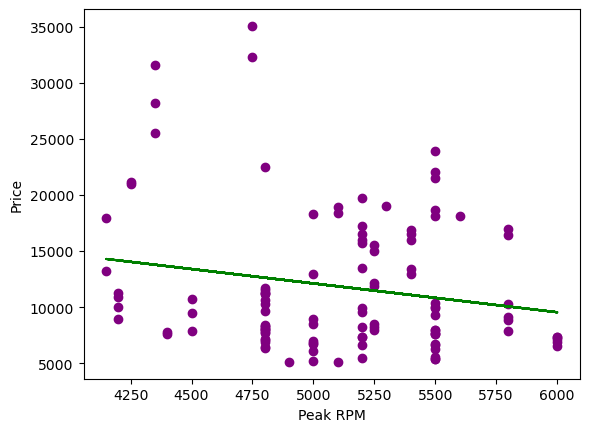

In [105]:
plt.scatter(train_X[['peak_rpm']],train_y,color='purple')
plt.plot(train_X[['peak_rpm']],train_predreg2,color='green')
plt.xlabel('Peak RPM')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

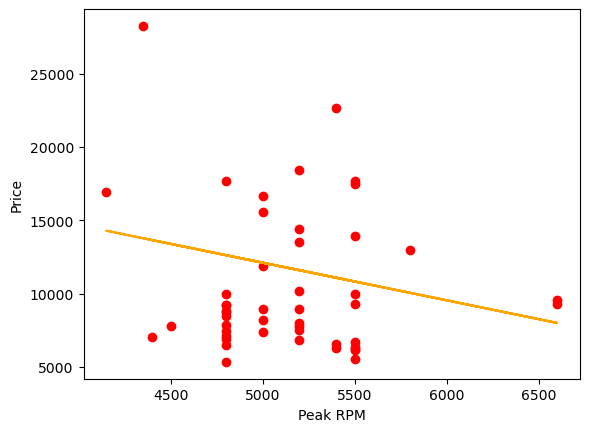

In [107]:
plt.scatter(test_X[['peak_rpm']],test_y,color='red')
plt.plot(test_X[['peak_rpm']],test_predreg2,color='orange')
plt.xlabel('Peak RPM')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

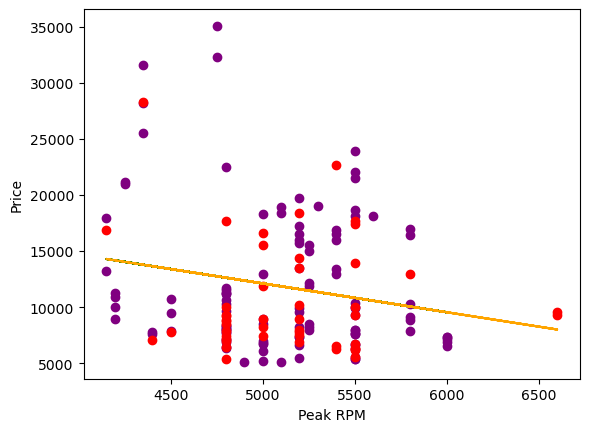

In [109]:
plt.scatter(train_X[['peak_rpm']],train_y,color='purple')
plt.scatter(test_X[['peak_rpm']],test_y,color='red')
plt.plot(train_X[['peak_rpm']],train_predreg2,color='green')
plt.plot(test_X[['peak_rpm']],test_predreg2,color='orange')
plt.xlabel('Peak RPM')
plt.ylabel('Price')

# Model for highway mpg vs price

In [110]:
reg_3=LinearRegression()

In [111]:
reg_3.fit(train_X[['highway_mpg']],train_y)

LinearRegression()

In [112]:
train_predreg3=reg_3.predict(train_X[['highway_mpg']])
test_predreg3=reg_3.predict(test_X[['highway_mpg']])

In [113]:
error_met(train_y,train_predreg3)

mae: 3044.422532022397
mape: 0.28790392281324906
rmse: 4148.287002538906
mse: 17208285.05543322
r2 score: 0.5529962315851537


In [114]:
error_met(test_y,test_predreg3)

mae: 3063.4157968890213
mape: 0.31341358768925787
rmse: 4002.055616155916
mse: 16016449.154805109
r2 score: 0.3168008316684998


train error > test error. It is underfitting

In [116]:
reg_3.coef_

array([-734.70516583])

In [117]:
reg_3.intercept_

35255.46366098402

# Price=  [-734.70516583] highway_mpg+35255.46366098402

Text(0, 0.5, 'Price')

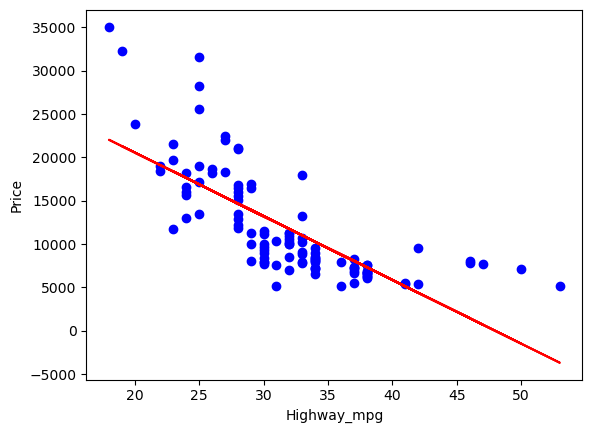

In [118]:
plt.scatter(train_X[['highway_mpg']],train_y,color='blue')
plt.plot(train_X[['highway_mpg']],train_predreg3,color='red')
plt.xlabel('Highway_mpg')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

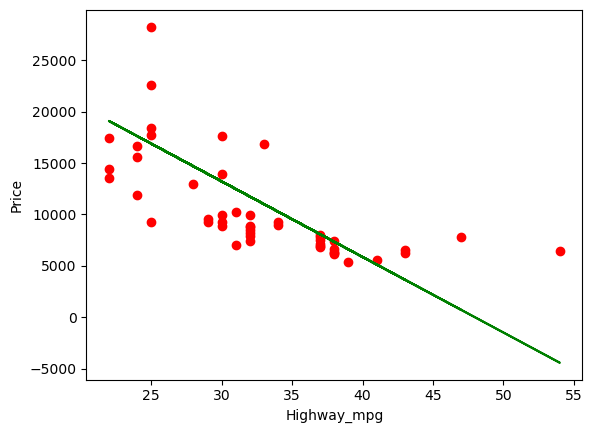

In [120]:
plt.scatter(test_X[['highway_mpg']],test_y,color='red')
plt.plot(test_X[['highway_mpg']],test_predreg3,color='green')
plt.xlabel('Highway_mpg')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

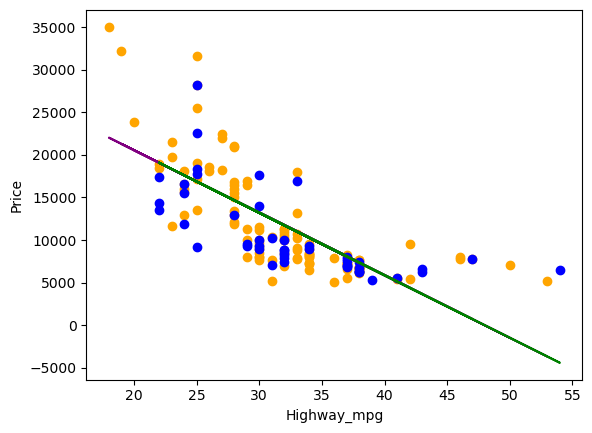

In [121]:
plt.scatter(train_X[['highway_mpg']],train_y,color='orange')
plt.scatter(test_X[['highway_mpg']],test_y,color='blue')
plt.plot(train_X[['highway_mpg']],train_predreg3,color='purple')
plt.plot(test_X[['highway_mpg']],test_predreg3,color='green')
plt.xlabel('Highway_mpg')
plt.ylabel('Price')

# Multiple Linear Regression

In [122]:
reg_ML=LinearRegression()

In [123]:
reg_ML.fit(train_X,train_y)

LinearRegression()

In [124]:
train_predML=reg_ML.predict(train_X)
test_predML=reg_ML.predict(test_X)

In [125]:
error_met(train_y,train_predML)

mae: 626.1813766891892
mape: 0.060658371379102564
rmse: 810.6406759843801
mse: 657138.3055604127
r2 score: 0.9829301235998233


In [126]:
error_met(test_y,test_predML)

mae: 2215506698726.9204
mape: 173885304.67677107
rmse: 10670598670404.898
mse: 1.1386167598484679e+26
r2 score: -4.856894408105442e+18


In [127]:
reg_ML.coef_

array([ 7.35517345e+13,  4.26118362e+12,  1.07455935e+13,  4.26118361e+12,
        4.26118361e+12,  4.26118361e+12,  4.26118361e+12,  7.35517345e+13,
        4.26118361e+12,  4.26118361e+12, -4.44645247e+12,  4.26118361e+12,
        4.26118362e+12,  4.26118362e+12,  9.26344263e+11,  4.26118361e+12,
        4.26118361e+12,  4.26118361e+12,  4.72231238e+03, -4.72232520e+03,
       -5.71653320e+02,  5.70739258e+02,  2.61897705e+02, -2.62018433e+02,
       -1.92679607e+13,  4.81699017e+12,  4.81699017e+12,  4.81699017e+12,
        4.81699017e+12, -8.13677063e+02, -1.72154297e+02,  9.85770508e+02,
        9.76562500e-04, -2.40849508e+12,  6.29914099e+12, -2.40849509e+12,
        9.26344263e+11, -2.40849508e+12, -1.92679607e+13, -4.33529115e+13,
        2.59376394e+13,  2.59376394e+13,  1.07455935e+13, -7.81953003e+02,
       -7.99214478e+02,  4.72228760e+03, -1.04648666e+01, -9.48310425e+02,
       -2.18212488e+03,  2.04521484e+01,  8.90722656e+00,  4.60712891e+02,
       -1.62906250e+02,  

In [128]:
reg_ML.intercept_

-32607318053082.26

<Axes: >

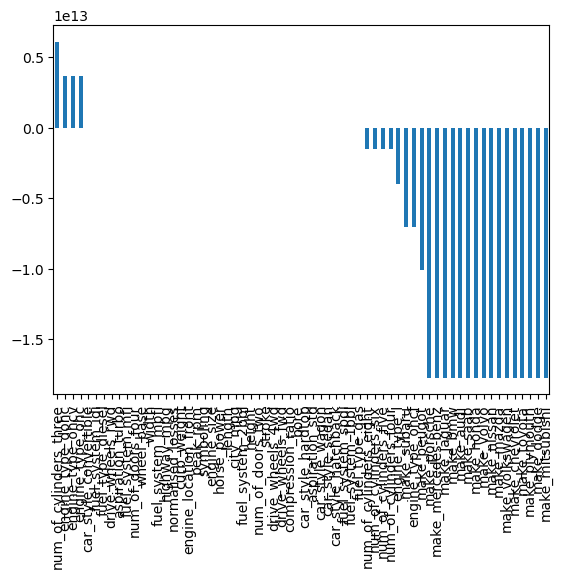

In [130]:
pd.Series(model.coef_,X.columns).sort_values(ascending=False).plot(kind='bar')

<Axes: >

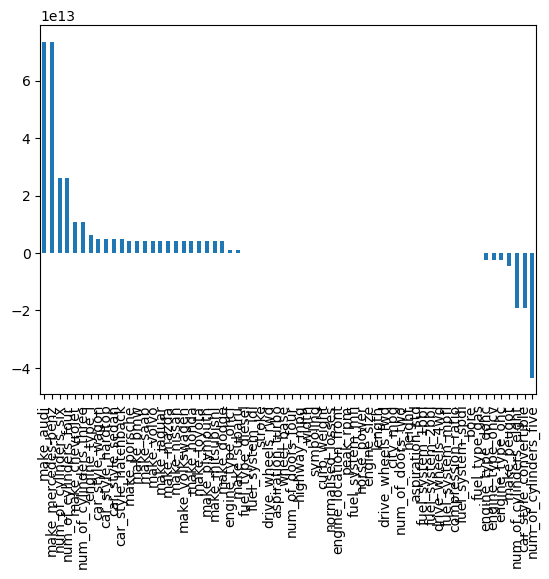

In [129]:
pd.Series(reg_ML.coef_,train_X.columns).sort_values(ascending=False).plot(kind='bar')

# Polynomial Regression

In [131]:
poly_2=PolynomialFeatures(degree=2,include_bias=False)

In [132]:
train_X_poly=poly_2.fit_transform(X)
test_X_poly=poly_2.transform(test_X)

In [133]:
model_poly2=LinearRegression()

In [134]:
model_poly2.fit(train_X_poly,y)

LinearRegression()

In [135]:
train_predict_poly2 = model_poly2.predict(train_X_poly)
test_predict_poly2 = model_poly2.predict(test_X_poly)

In [138]:
y_poly=pd.DataFrame(y.head(48))

In [139]:
error_met(y_poly,test_predict_poly2)

mae: 6480.968749999738
mape: 0.553960629849385
rmse: 9070.187037819858
mse: 82268292.90103538
r2 score: -0.47792092225452376


In [146]:
poly_3=PolynomialFeatures(degree=3,include_bias=False)

In [147]:
train_X_poly3=poly_3.fit_transform(X)
test_X_poly3=poly_3.transform(test_X)

In [148]:
model_poly3=LinearRegression()

In [149]:
model_poly3.fit(train_X_poly3,y)

LinearRegression()

In [151]:
train_predict_poly3 = model_poly3.predict(train_X_poly3)
test_predict_poly3 = model_poly3.predict(test_X_poly3)

In [152]:
error_met(y_poly,test_predict_poly3)

mae: 6480.968749995343
mape: 0.5539606298515305
rmse: 9070.187037807067
mse: 82268292.90080334
r2 score: -0.4779209222503553


# Regularisation

# Ridge regression

In [156]:
model_rid = Ridge(alpha = 100)

In [157]:
model_rid.fit(X,y)

Ridge(alpha=100)

In [160]:
train_predictrid = model_rid.predict(X)

In [159]:
test_Xrid = data_preprocessed.drop(columns=['price'])

In [161]:
test_predictrid = model_rid.predict(test_Xrid)

In [163]:
error_met(y,test_predictrid)

mae: 1570.3436761993014
mape: 0.1365132846579969
rmse: 2174.834537292031
mse: 4729905.264598244
r2 score: 0.8622300291750663


<Axes: >

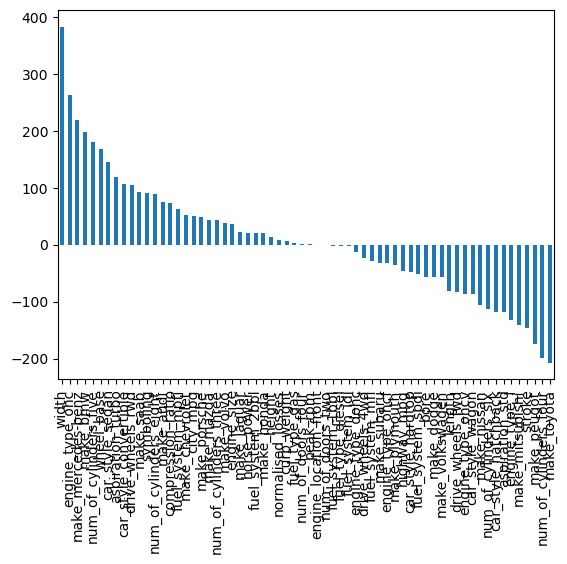

In [164]:
pd.Series(model_rid.coef_,X.columns).sort_values(ascending=False).plot(kind='bar')

# Lasso

In [165]:
model_lasso = Lasso(alpha = 10)

In [166]:
model_lasso.fit(X,y)

Lasso(alpha=10)

In [167]:
train_predictlasso = model_lasso.predict(X)

In [168]:
test_Xlasso = data_preprocessed.drop(columns=['price'])

In [169]:
test_predictlasso = model_rid.predict(test_Xlasso)

In [170]:
error_met(y,test_predictlasso)

mae: 1570.3436761993014
mape: 0.1365132846579969
rmse: 2174.834537292031
mse: 4729905.264598244
r2 score: 0.8622300291750663


<Axes: >

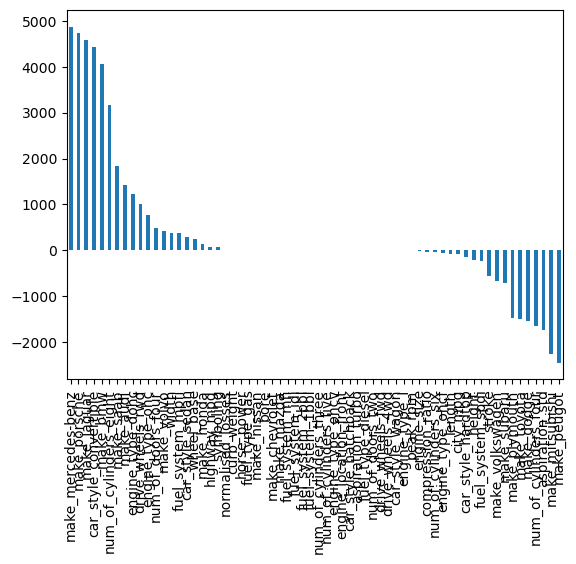

In [171]:
pd.Series(model_lasso.coef_,X.columns).sort_values(ascending=False).plot(kind='bar')

# Elastic net

In [172]:
model_el = ElasticNet(alpha = 10)

In [173]:
model_el.fit(X,y)

ElasticNet(alpha=10)

In [174]:
train_predictel = model_el.predict(X)

In [175]:
test_Xel = data_preprocessed.drop(columns=['price'])

In [176]:
test_predictel = model_el.predict(test_Xel)

In [177]:
error_met(y,test_predictel)

mae: 1683.3266245654547
mape: 0.14288724572212005
rmse: 2379.8315200733327
mse: 5663598.063934549
r2 score: 0.8350339602206198


<Axes: >

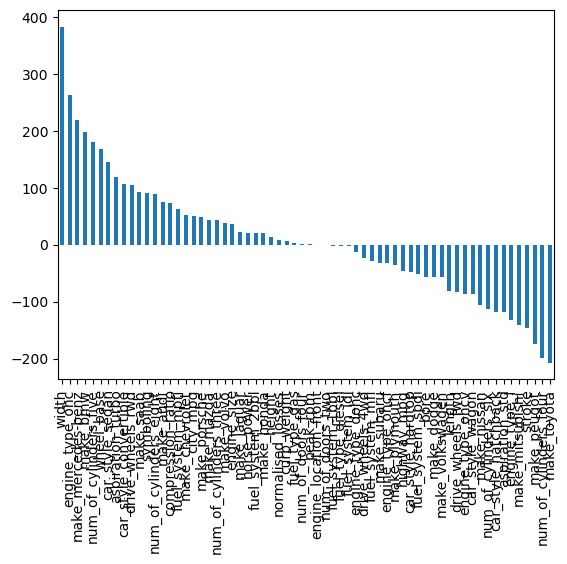

In [178]:
pd.Series(model_rid.coef_,X.columns).sort_values(ascending=False).plot(kind='bar')